In [1]:
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sgt import SGT
import os 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import math
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from keras.optimizers import Adam, SGD, RMSprop
from keras.metrics import binary_accuracy, Precision, Recall, AUC

from sklearn.metrics import confusion_matrix
import seaborn as sns


2023-03-18 00:53:55.429796: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-18 00:53:55.928331: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-18 00:53:55.928377: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-18 00:53:55.928382: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
#Read Corpus
path = '../TOP_CON/Healthy/'
folder_names = os.listdir(path)

def load_files(folder_names, path):
    l = []
    for folder in folder_names: 
        p = path + folder + '/'
        p_os = os.listdir(p)
        for filename in p_os:
            if filename!='.ipynb_checkpoints': 
                new_path = p + filename 
                x = pd.read_csv(new_path)
                l.append(x)
    return l
corpus_healthy = load_files(folder_names, path)

path = '../TOP_CON/Glaucoma/'
folder_names = os.listdir(path)

corpus_diseased = load_files(folder_names, path)


for i in corpus_diseased:
    i['fixation_id_new'] = i['fixation_id'] - i.iloc[0,2] + 1

for i in corpus_healthy:
    i['fixation_id_new'] = i['fixation_id'] - i.iloc[0,2] + 1


In [3]:
def cat_encode(x,y):
    arr = []
    for i,j in zip(x,y):
        if 0<i and 0.6 > i and 0<j and 0.6 > j: 
            arr.append('A')
        elif 0<i and 0.25 > i and 0.6<j and 1 > j: 
            arr.append('B')
        elif 0.25<i and 0.48 > i and 0.6<j and 1 > j: 
            arr.append('C')
        elif 0.48<i and 0.6 > i and 0.6<j and 1 > j: 
            arr.append('D')
        elif 0.6<i and 1 > i and 0<j and 0.6 > j: 
            arr.append('E')
        elif 0.6<i and 0.77 > i and 0.6<j and 1 > j: 
            arr.append('F')
        elif 0.77<i and 1 > i and 0.6<j and 1 > j: 
            arr.append('G')
        else: 
            arr.append('error')

    return arr
    
def make_corpus(corpus_new):
    A = np.array(corpus_new.fixation_id_new[corpus_new.letters=='A'])
    B = np.array(corpus_new.fixation_id_new[corpus_new.letters=='B'])
    C = np.array(corpus_new.fixation_id_new[corpus_new.letters=='C'])
    D = np.array(corpus_new.fixation_id_new[corpus_new.letters=='D'])
    E = np.array(corpus_new.fixation_id_new[corpus_new.letters=='E'])
    F = np.array(corpus_new.fixation_id_new[corpus_new.letters=='F'])
    G = np.array(corpus_new.fixation_id_new[corpus_new.letters=='G'])
    corpus = pd.DataFrame([[1, A], 
                           [2, B],
                           [3, C], 
                           [4, D], 
                           [5, E], 
                           [6, F],
                           [7, G]], columns=['id', 'sequence'])
    return corpus

l = []
for i in corpus_healthy: 
    arr = cat_encode(i.norm_pos_x, i.norm_pos_y)
    
    i['letters'] = arr
    i_new = i[['letters', 'fixation_id_new']]
    i_new = make_corpus(i_new)
    l.append(i_new)
    
for i in corpus_diseased: 
    arr = cat_encode(i.norm_pos_x, i.norm_pos_y)
    i['letters'] = arr
    i_new = i[['letters', 'fixation_id_new']]
    i_new = make_corpus(i_new)
    l.append(i_new)
    


In [4]:
e = []
for i in l: 
    sgt_ = SGT(kappa=1, 
               lengthsensitive=False, 
               mode='multiprocessing')
    sgtembedding_df = sgt_.fit_transform(i)
    sgtembedding_df = sgtembedding_df.set_index('id')
    e.append(sgtembedding_df)
    

print(len(e))
print(e[0])

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
INFO: Pandarallel will run on 31 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

In [140]:
df2 = pd.DataFrame()
for i in e: 
    pca = PCA(n_components=1)
    pca.fit(i)
    X=pca.transform(i)
    df = pd.DataFrame(data=X, columns=['x1'])
    df_new = pd.DataFrame([[df.iloc[0,0], 
                   df.iloc[1,0], 
                   df.iloc[2,0], 
                  df.iloc[3,0],
                  df.iloc[4,0], 
                   df.iloc[5,0],
                  df.iloc[6,0]]], 
                 columns = ['0x1', '1x1', '2x1',  '3x1',  '4x1', '5x1',  '6x1'])
    df2 = pd.concat([df2, df_new])
df2 = df2.reset_index().drop(["index"], axis = 1)
labels = [1]*120 + [0]*119

df2['labels'] = labels
df2

,0x1,1x1,2x1,3x1,4x1,5x1,6x1,labels
0,0.958814,-0.157562,-0.157562,-0.157562,-0.157562,-0.157562,-0.171003,1
1,0.492505,-0.076684,-0.076684,-0.076684,-0.076684,-0.109084,-0.076684,1
2,1.040909,-0.152488,-0.152488,-0.177155,-0.253801,-0.152488,-0.152488,1
3,0.583557,-0.083858,-0.083858,-0.083858,-0.119260,-0.106362,-0.106362,1
4,0.398856,-0.013757,-0.013757,-0.013757,-0.026890,-0.316938,-0.013757,1
...,...,...,...,...,...,...,...,...
234,1.054057,-0.169547,-0.169547,-0.189305,-0.186566,-0.169547,-0.169547,0
235,0.687810,-0.116309,-0.147840,-0.116309,-0.074732,-0.116309,-0.116309,0
236,0.313248,-0.037692,-0.037692,-0.037692,-0.124787,-0.037692,-0.037692,0
237,1.261763,-0.157908,-0.182191,-0.121104,-0.549556,-0.129901,-0.121104,0


In [6]:
df1 = pd.DataFrame()
for i in e: 
    pca = PCA(n_components=2)
    pca.fit(i)
    X=pca.transform(i)
    df = pd.DataFrame(data=X, columns=['x1', 'x2'])
    df_new = pd.DataFrame([[df.iloc[0,0], df.iloc[0,1], 
                   df.iloc[1,0], df.iloc[1,1], 
                   df.iloc[2,0], df.iloc[2,1], 
                  df.iloc[3,0], df.iloc[3,1], 
                  df.iloc[4,0], df.iloc[4,1], 
                   df.iloc[5,0], df.iloc[5,1], 
                  df.iloc[6,0], df.iloc[6,1]]], 
                 columns = ['0x1', '0x2', '1x1', '1x2', '2x1', '2x2', '3x1', '3x2', '4x1', '4x2', '5x1', '5x2', '6x1', '6x2'])
    df1 = pd.concat([df1, df_new])
df1 = df1.reset_index().drop(["index"], axis = 1)
labels = [1]*120 + [0]*119

df1['labels'] = labels
df1

,0x1,0x2,1x1,1x2,2x1,2x2,3x1,3x2,4x1,4x2,5x1,5x2,6x1,6x2,labels
0,0.958814,0.002904,-0.157562,-0.048826,-0.157562,-0.048826,-0.157562,-0.048826,-0.157562,-0.048826,-0.157562,-0.048826,-0.171003,0.241227,1
1,0.492505,0.013559,-0.076684,-0.050352,-0.076684,-0.050352,-0.076684,-0.050352,-0.076684,-0.050352,-0.109084,0.238200,-0.076684,-0.050352,1
2,1.040909,0.045676,-0.152488,-0.110288,-0.152488,-0.110288,-0.177155,-0.188429,-0.253801,0.583907,-0.152488,-0.110288,-0.152488,-0.110288,1
3,0.583557,0.007808,-0.083858,-0.024879,-0.083858,-0.024879,-0.083858,-0.024879,-0.119260,0.287432,-0.106362,-0.110301,-0.106362,-0.110301,1
4,0.398856,0.211806,-0.013757,-0.075144,-0.013757,-0.075144,-0.013757,-0.075144,-0.026890,-0.208519,-0.316938,0.297288,-0.013757,-0.075144,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1.054057,0.001520,-0.169547,-0.016370,-0.169547,-0.016370,-0.189305,0.281765,-0.186566,-0.217804,-0.169547,-0.016370,-0.169547,-0.016370,0
235,0.687810,-0.021888,-0.116309,0.004327,-0.147840,-0.238143,-0.116309,0.004327,-0.074732,0.242721,-0.116309,0.004327,-0.116309,0.004327,0
236,0.313248,0.055010,-0.037692,-0.055334,-0.037692,-0.055334,-0.037692,-0.055334,-0.124787,0.221661,-0.037692,-0.055334,-0.037692,-0.055334,0
237,1.261763,0.311580,-0.157908,-0.316158,-0.182191,-0.378833,-0.121104,-0.229561,-0.549556,1.091942,-0.129901,-0.249410,-0.121104,-0.229561,0


In [9]:
# df1 = df1.sample(frac=1)
labels = df1.labels
df_new = df1.drop(['labels'], axis =1 )
col = df_new.columns
mm = MinMaxScaler()
df_new = mm.fit_transform(df_new)
df_new = df_new*100


# train = df_new[0:120]
# train_labels = np.array(labels[0:120])

# test = df_new[120:]
# test_labels = np.array(labels[120:])

X_train, X_test, y_train, y_test = train_test_split(df_new, labels, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)




In [167]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes-first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    return layers

FindLayerNodesLinear(7, 100, 50)

[100, 92, 84, 76, 67, 59, 51]

In [168]:
def createmodel(n_layers, first_layer_nodes, activation_func, loss_func, last_layer_nodes):
    model = Sequential()
    print(n_layers, first_layer_nodes, last_layer_nodes)
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss=loss_func, metrics = ["accuracy"]) 
    
    return model

model =  KerasClassifier(build_fn=createmodel, verbose = False)  


/tmp/ipykernel_2789350/3524246904.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model =  KerasClassifier(build_fn=createmodel, verbose = False)


In [169]:
# activation_funcs = ['relu', 'tanh'] 
loss_funcs = ['binary_crossentropy']
param_grid = dict(n_layers=np.arange(2,10), first_layer_nodes = [50,100,150,200],activation_func = activation_funcs, loss_func = loss_funcs, last_layer_nodes= [30,40,50], batch_size = [30,40,50], epochs = [50,100,150])
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1)


In [170]:
grid.fit(X_train,y_train)

2023-02-27 22:45:40.782333: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:45:41.387909: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:45:41.437501: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2023-02-27 22:45:41.823691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:45:41.864926: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:45:41.865338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

2023-02-27 22:45:42.526627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:45:42.526694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:45:42.526700: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:45:42.558743: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory


2023-02-27 22:45:43.300653: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.301258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.324786: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.325140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.329101: W tensorflow/compiler/xla/stream_executo

2023-02-27 22:45:43.532505: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.533232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.541364: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:45:43.541487: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:45:43.541511: W tensorflow/c

2023-02-27 22:45:43.735476: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.735780: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:45:43.750316: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:45:43.750444: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

2023-02-27 22:45:44.394912: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:45:44.397902: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 22:45:44.398346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:45:44.445039: I

2023-02-27 22:45:44.826288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:45:44.837372: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:45:44.837464: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 22:45:44.837596: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure 

2 50 30
9 50 30
7 50 40
8 50 50
8 100 30
7 100 40
5 100 50
4 150 30
2 150 40
8 150 40
6 150 50
5 200 30
3 200 40
2 200 50
4 200 50
9 200 50
8 50 30
7 50 40
4 50 50
2 100 30
5 100 30
3 100 40
6 100 40
6 100 50
4 150 30
9 150 30
7 150 40
5 150 50
3 200 30
2 200 40
8 200 40
6 200 50
6 50 30
5 50 40
4 50 50
2 100 30
5 100 30
4 100 40
9 100 40
3 150 30
8 150 30
9 150 40
6 150 50
4 200 30
8 200 30
3 200 50
6 200 50
5 50 30
8 50 30
3 50 40
2 50 50
6 50 50
4 100 30
2 100 40
9 100 40
3 150 30
8 150 30
8 150 40
6 150 50
3 200 30
8 200 30
7 200 40
8 200 50
7 50 30
4 50 40
2 50 50
4 50 50
2 100 30
7 100 30
4 100 40
2 100 50
9 100 50
7 150 30
3 150 40
9 150 40
2 200 30
6 200 30
7 200 40
5 200 50
6 50 30
5 50 40
4 50 50
3 100 30
8 100 30
6 100 40
4 100 50
9 100 50
2 150 40
7 150 40
7 150 50
5 200 30
3 200 40
9 200 40
3 50 30
6 50 30
3 50 40
9 50 40
8 50 50
7 100 30
4 100 40
2 100 50
5 100 50
4 150 30
4 150 40
2 150 50
9 150 50
7 200 30
6 200 40
4 200 50
2 50 30
7 50 30
7 50 40
2 100 30
2 100 40
5 10

/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


2 50 30
8 50 30
9 50 40
9 50 50
8 100 30
6 100 40
4 100 50
4 150 30
2 150 40
5 150 40
4 150 50
3 200 30
9 200 30
9 200 40
9 200 50
7 50 30
5 50 40
3 50 50
8 50 50
7 100 30
7 100 40
4 100 50
2 150 30
6 150 30
4 150 40
2 150 50
7 150 50
6 200 30
5 200 40
4 200 50
2 50 30
8 50 30
6 50 40
2 100 30
7 100 30
5 100 40
2 100 50
8 100 50
6 150 30
6 150 40
3 150 50
8 150 50
2 200 40
7 200 40
4 200 50
9 200 50
2 50 40
7 50 40
4 50 50
2 100 30
8 100 30
7 100 40
6 100 50
5 150 30
3 150 40
6 150 40
7 150 50
4 200 30
3 200 40
9 200 40
8 200 50
7 50 30
6 50 40
4 50 50
2 100 30
6 100 30
6 100 40
6 100 50
5 150 30
5 150 40
3 150 50
2 200 30
5 200 30
3 200 40
2 200 50
5 200 50
3 50 30
9 50 30
6 50 40
5 50 50
4 100 30
2 100 40
9 100 40
8 100 50
7 150 30
6 150 40
4 150 50
4 200 30
2 200 40
8 200 40
5 200 50
3 50 30
9 50 30
8 50 40
8 50 50
9 100 30
2 100 50
6 100 50
4 150 30
9 150 30
9 150 40
7 150 50
7 200 30
9 200 40
9 200 50
6 50 30
4 50 40
3 50 50
7 50 50
6 100 30
6 100 40
5 100 50
4 150 30
2 150 40
5 1

2023-02-27 22:52:48.894199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:52:50.086694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:52:50.088345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:52:50.088542: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

2 50 30
8 50 30
8 50 40
9 50 50
9 100 30
7 100 40
6 100 50
7 150 30
6 150 40
3 150 50
2 200 30
6 200 30
5 200 40
5 200 50
3 50 30
3 50 40
2 50 50
5 50 50
2 100 30
7 100 30
4 100 40
2 100 50
5 100 50
5 150 30
4 150 40
3 150 50
7 150 50
6 200 30
5 200 40
4 200 50
2 50 30
7 50 30
5 50 40
4 50 50
3 100 30
8 100 30
6 100 40
3 100 50
8 100 50
7 150 30
5 150 40
3 150 50
9 150 50
6 200 30
4 200 40
2 200 50
5 200 50
3 50 30
6 50 30
7 50 40
5 50 50
3 100 30
8 100 30
6 100 40
4 100 50
2 150 30
6 150 30
6 150 40
3 150 50
8 150 50
9 200 30
2 200 50
6 200 50
4 50 30
9 50 30
3 50 50
7 50 50
9 100 30
9 100 40
2 150 30
8 150 30
8 150 40
9 150 50
9 200 30
2 200 50
6 200 50
4 50 30
3 50 40
8 50 40
6 50 50
6 100 30
5 100 40
2 100 50
5 100 50
3 150 30
9 150 30
9 150 40
8 150 50
7 200 30
5 200 40
7 200 50
4 50 30
8 50 30
5 50 40
2 50 50
2 100 30
8 100 30
8 100 40
9 100 50
7 150 30
8 150 40
8 150 50
2 200 40
4 200 40
3 200 50
9 200 50
8 50 30
7 50 40
5 50 50
3 100 30
9 100 30
8 100 40
5 100 50
4 150 30
9 150

2023-02-27 22:53:00.450370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:01.430047: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:01.430534: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:01.430599: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

7 50 30
4 50 40
3 50 50
2 100 30
8 100 30
6 100 40
3 100 50
3 150 30
9 150 30
3 150 50
9 150 50
2 200 40
4 200 40
9 200 40
8 200 50
6 50 30
4 50 40
2 50 50
8 50 50
7 100 30
7 100 40
4 100 50
2 150 30
5 150 30
2 150 40
5 150 40
4 150 50
3 200 30
8 200 30
7 200 40
6 200 50
4 50 30
2 50 40
7 50 40
4 50 50
3 100 30
8 100 30
3 100 50
7 100 50
4 150 30
9 150 30
4 150 50
8 150 50
3 200 40
7 200 40
5 200 50
3 50 30
8 50 30
6 50 40
7 50 50
6 100 30
5 100 40
3 100 50
9 100 50
8 150 30
7 150 40
6 150 50
5 200 30
5 200 40
4 200 50
3 50 30
8 50 30
9 50 40
7 50 50
8 100 30
8 100 40
5 100 50
4 150 30
2 150 40
4 150 40
2 150 50
6 150 50
3 200 30
9 200 30
3 200 50
7 200 50
6 50 30
4 50 40
3 50 50
9 50 50
7 100 30
8 100 40
8 100 50
6 150 30
5 150 40
2 150 50
8 150 50
8 200 30
7 200 40
5 200 50
2 50 30
7 50 30
4 50 40
3 50 50
7 50 50
5 100 30
3 100 40
2 100 50
6 100 50
3 150 30
2 150 40
7 150 40
6 150 50
5 200 30
2 200 40
9 200 40
3 50 30
9 50 30
7 50 40
4 50 50
4 100 30
9 100 30
7 100 40
6 100 50
7 150 

2023-02-27 22:53:09.206762: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5 50 30
6 50 40
4 50 50
4 100 30
2 100 40
8 100 40
6 100 50
2 150 30
8 150 30
6 150 40
3 150 50
8 150 50
7 200 30
6 200 40
4 200 50
2 50 30
9 50 30
2 50 50
6 50 50
5 100 30
4 100 40
9 100 40
2 150 30
2 150 40
8 150 40
6 150 50
4 200 30
3 200 40
9 200 40
7 200 50
5 50 30
4 50 40
3 50 50
8 50 50
3 100 40
2 100 50
6 100 50
4 150 30
8 150 30
6 150 40
5 150 50
3 200 30
7 200 30
8 200 40
2 50 30
5 50 30
9 50 30
7 50 40
9 50 50
8 100 30
9 100 40
7 100 50
7 150 30
7 150 40
2 200 30
9 200 30
9 200 40
8 200 50
7 50 30
5 50 40
3 50 50
9 50 50
3 100 40
6 100 40
7 100 50
9 150 30
7 150 40
5 150 50
3 200 30
4 200 40
8 200 40
5 200 50
2 50 30
9 50 30
8 50 40
7 50 50
5 100 30
3 100 40
7 100 40
4 100 50
3 150 30
9 150 30
9 150 40
7 150 50
5 200 30
3 200 40
7 200 40
5 200 50
2 50 30
8 50 30
5 50 40
9 50 40
5 100 30
5 100 40
3 100 50
7 100 50
7 150 30
5 150 40
3 150 50
7 150 50
7 200 30
9 200 40
9 200 50
6 50 30
8 50 40
9 50 50
6 100 30
4 100 40
4 100 50
2 150 30
5 150 30
2 150 40
6 150 40
5 150 50
4 200

2023-02-27 22:53:10.352649: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:10.353129: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:10.353184: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


6 50 30
3 50 40
7 50 40
7 50 50
6 100 30
5 100 40
5 100 50
2 150 30
7 150 30
7 150 40
6 150 50
5 200 30
4 200 40
3 200 50
7 200 50
4 50 30
3 50 40
8 50 40
9 50 50
2 100 40
6 100 40
5 100 50
5 150 30
3 150 40
3 150 50
8 150 50
7 200 30
4 200 40
2 200 50
7 200 50
6 50 30
4 50 40
3 50 50
9 50 50
9 100 30
7 100 40
5 100 50
2 150 30
7 150 30
4 150 40
2 150 50
6 150 50
9 200 30
6 200 40
7 200 50
6 50 30
5 50 40
2 100 30
6 100 30
6 100 40
5 100 50
2 150 30
5 150 30
2 150 40
7 150 40
5 150 50
5 200 30
5 200 40
2 200 50
6 200 50
5 50 30
3 50 40
9 50 40
6 50 50
4 100 30
3 100 40
7 100 40
5 100 50
3 150 30
9 150 30
6 150 40
4 150 50
2 200 30
6 200 30
6 200 40
3 200 50
7 200 50
4 50 30
2 50 40
8 50 40
8 50 50
8 100 30
6 100 40
4 100 50
2 150 30
7 150 30
5 150 40
3 150 50
8 150 50
7 200 30
6 200 40
8 200 50
2 50 50
6 50 50
4 100 30
2 100 40
6 100 40
4 100 50
5 150 30
3 150 40
9 150 40
9 150 50
8 200 30
6 200 40
3 200 50
9 200 50
8 50 30
2 50 50
7 50 50
5 100 30
4 100 40
9 100 40
5 100 50
3 150 30
9

2023-02-27 22:53:11.468594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:11.819162: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:11.819943: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:11.904456: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open sha

6 50 30
3 50 40
3 50 50
8 50 50
6 100 30
4 100 40
2 100 50
7 100 50
7 150 30
5 150 40
4 150 50
2 200 30
9 200 30
9 200 40
3 50 30
8 50 30
7 50 40
7 50 50
4 100 30
4 100 40
9 100 40
2 150 30
6 150 30
4 150 40
2 150 50
9 150 50
9 200 30
9 200 40
8 200 50
7 50 30
5 50 40
4 50 50
2 100 30
7 100 30
6 100 40
2 100 50
9 100 50
7 150 30
5 150 40
3 150 50
8 150 50
9 200 30
3 200 50
9 200 50
6 50 40
3 50 50
2 100 30
6 100 30
4 100 40
3 100 50
9 100 50
9 150 30
9 150 40
2 200 30
5 200 30
3 200 40
3 200 50
2 50 30
6 50 30
4 50 40
2 50 50
7 50 50
4 100 30
2 100 40
5 100 40
4 100 50
2 150 30
7 150 30
5 150 40
3 150 50
7 150 50
4 200 30
9 200 30
9 200 40
9 200 50
5 50 30
4 50 40
3 50 50
2 100 30
5 100 30
4 100 40
2 100 50
8 100 50
8 150 30
6 150 40
4 150 50
3 200 30
9 200 30
9 200 40
8 200 50
7 50 40
5 50 50
3 100 30
8 100 30
6 100 40
6 100 50
7 150 30
7 150 40
5 150 50
9 150 50
6 200 30
5 200 40
3 200 50
8 200 50
9 50 30
3 50 50
8 50 50
8 100 30
5 100 40
2 100 50
7 100 50
5 150 30
3 150 40
8 150 40


2023-02-27 22:53:12.702924: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:12.703415: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:12.703476: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:53:12.982684: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:

4 50 30
9 50 30
2 50 50
6 50 50
4 100 30
3 100 40
9 100 40
2 150 30
6 150 30
5 150 40
2 150 50
8 150 50
6 200 30
6 200 40
4 200 50
9 200 50
7 50 30
8 50 40
5 50 50
4 100 30
3 100 40
6 100 40
4 100 50
3 150 30
7 150 30
3 150 40
3 150 50
2 200 30
7 200 30
3 200 40
3 200 50
9 200 50
2 50 40
5 50 40
2 50 50
7 50 50
5 100 30
4 100 40
9 100 40
7 100 50
3 150 40
7 150 40
2 200 30
6 200 30
4 200 40
9 200 40
8 200 50
9 50 30
9 50 40
7 50 50
6 100 30
3 100 40
9 100 40
7 100 50
6 150 30
4 150 40
2 150 50
5 150 50
2 200 30
8 200 30
7 200 40
6 200 50
4 50 30
5 50 40
4 50 50
9 50 50
8 100 30
2 100 50
5 100 50
7 150 30
7 150 40
4 150 50
3 200 30
8 200 30
5 200 40
4 200 50
4 50 30
3 50 40
2 50 50
6 50 50
4 100 30
2 100 40
9 100 40
9 100 50
7 150 30
5 150 40
3 150 50
2 200 30
8 200 30
6 200 40
4 200 50
9 200 50
7 50 40
5 50 50
2 100 30
6 100 30
4 100 40
8 100 40
9 100 50
8 150 30
6 150 40
3 150 50
9 150 50
8 200 30
5 200 40
6 200 50
3 50 30
8 50 30
9 50 40
7 50 50
9 100 30
7 100 40
6 100 50
8 150 30
6 

2023-02-27 22:53:13.736027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:14.022936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:14.023245: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:14.078424: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open sha

3 50 30
2 50 40
9 50 40
9 50 50
9 100 30
9 100 40
7 100 50
9 150 30
2 150 50
7 150 50
5 200 30
4 200 40
4 200 50
2 50 30
8 50 30
9 50 40
9 50 50
8 100 30
8 100 40
8 100 50
6 150 30
5 150 40
4 150 50
3 200 30
8 200 30
9 200 40
9 200 50
7 50 30
6 50 40
5 50 50
3 100 30
9 100 30
7 100 40
2 150 30
5 150 30
2 150 40
8 150 40
8 150 50
2 200 40
5 200 40
4 200 50
7 200 50
6 50 30
2 50 40
6 50 40
4 50 50
3 100 30
7 100 30
4 100 40
2 100 50
7 100 50
8 150 30
7 150 40
6 150 50
7 200 30
6 200 40
5 200 50
3 50 30
9 50 30
8 50 40
6 50 50
5 100 30
5 100 40
6 100 50
8 150 30
5 150 40
4 150 50
9 150 50
2 200 40
5 200 40
4 200 50
9 200 50
8 50 30
7 50 40
6 50 50
5 100 30
3 100 40
9 100 40
9 100 50
4 150 40
2 150 50
9 150 50
9 200 30
7 200 40
4 200 50
2 50 30
7 50 30
5 50 40
3 50 50
7 50 50
4 100 30
9 100 30
2 100 50
7 100 50
5 150 30
7 150 40
7 150 50
6 200 30
4 200 40
2 200 50
6 200 50
5 50 30
3 50 40
2 50 50
7 50 50
5 100 30
3 100 40
9 100 40
9 100 50
6 150 30
4 150 40
9 150 40
3 200 30
9 200 30
2 200

2023-02-27 22:53:16.337410: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:16.337646: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:16.464128: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:16.470452: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

7 50 30
5 50 40
2 50 50
8 50 50
7 100 30
5 100 40
3 100 50
3 150 30
9 150 30
7 150 40
6 150 50
4 200 30
3 200 40
9 200 40
9 200 50
8 50 30
7 50 40
8 50 50
9 100 30
3 100 50
6 100 50
5 150 30
4 150 40
2 150 50
6 150 50
5 200 30
4 200 40
2 200 50
8 200 50
7 50 30
5 50 40
5 50 50
2 100 30
8 100 30
9 100 40
8 100 50
6 150 30
4 150 40
3 150 50
7 150 50
4 200 30
9 200 30
7 200 40
4 200 50
9 200 50
9 50 40
9 50 50
7 100 30
7 100 40
5 100 50
3 150 30
7 150 30
5 150 40
5 150 50
3 200 30
2 200 40
4 200 40
9 200 40
7 200 50
5 50 30
4 50 40
2 50 50
8 50 50
6 100 30
7 100 40
5 100 50
3 150 30
9 150 30
9 150 40
8 150 50
7 200 30
6 200 40
6 200 50
4 50 30
2 50 40
9 50 40
9 50 50
2 100 40
7 100 40
6 100 50
3 150 30
2 150 40
7 150 40
6 150 50
4 200 30
2 200 40
8 200 40
3 50 30
7 50 30
5 50 40
3 50 50
8 50 50
7 100 30
7 100 40
7 100 50
6 150 30
4 150 40
9 150 40
2 200 30
7 200 30
5 200 40
3 200 50
8 200 50
2 50 40
6 50 40
4 50 50
2 100 30
5 100 30
4 100 40
8 100 40
7 100 50
4 150 40
4 150 50
9 150 50
9 

2023-02-27 22:53:17.694379: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:17.741449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:17.741972: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:17.817846: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open sha

2 50 30
2 50 40
8 50 40
5 50 50
2 100 30
7 100 30
6 100 40
4 100 50
3 150 30
6 150 30
4 150 40
4 150 50
3 200 30
7 200 30
5 200 40
5 200 50
3 50 30
9 50 30
8 50 40
7 50 50
4 100 30
9 100 30
9 100 40
9 100 50
6 150 30
5 150 40
3 150 50
9 150 50
9 200 30
8 200 40
7 200 50
8 50 30
6 50 40
3 50 50
8 50 50
7 100 30
5 100 40
4 100 50
3 150 30
3 150 40
8 150 40
5 150 50
4 200 30
8 200 30
3 200 50
6 200 50
5 50 40
3 50 50
9 50 50
9 100 30
2 100 50
9 100 50
2 150 40
5 150 40
3 150 50
9 150 50
6 200 30
5 200 40
4 200 50
3 50 30
9 50 30
2 50 50
6 50 50
4 100 30
2 100 40
6 100 40
4 100 50
2 150 30
6 150 30
6 150 40
6 150 50
8 200 30
9 200 40
8 200 50
8 50 30
6 50 40
4 50 50
9 50 50
9 100 30
7 100 40
6 100 50
4 150 30
2 150 40
6 150 40
5 150 50
2 200 30
6 200 30
3 200 40
8 200 40
3 50 30
6 50 30
2 50 40
6 50 40
4 50 50
9 50 50
3 100 40
7 100 40
6 100 50
5 150 30
5 150 40
4 150 50
2 200 30
6 200 30
5 200 40
4 200 50
2 50 30
7 50 30
5 50 40
6 50 50
4 100 30
4 100 40
2 100 50
8 100 50
5 150 40
3 150 5

2023-02-27 22:53:18.868928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:18.868983: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:18.868989: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:53:19.098473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:

4 50 30
8 50 30
3 50 50
6 50 50
5 100 30
3 100 40
2 100 50
7 100 50
7 150 30
5 150 40
2 150 50
6 150 50
4 200 30
3 200 40
2 200 50
7 200 50
6 50 30
6 50 40
4 50 50
3 100 30
9 100 30
3 100 50
8 100 50
8 150 30
8 150 40
5 150 50
4 200 30
3 200 40
8 200 40
7 200 50
5 50 30
3 50 40
9 50 40
8 50 50
6 100 30
4 100 40
9 100 40
7 100 50
2 150 40
8 150 40
7 150 50
8 200 30
5 200 40
4 200 50
8 200 50
7 50 30
4 50 40
5 50 50
4 100 30
2 100 40
7 100 40
5 100 50
2 150 30
9 150 30
9 150 40
2 200 30
8 200 30
6 200 40
4 200 50
4 50 30
2 50 40
7 50 40
8 50 50
2 100 40
9 100 40
2 150 30
7 150 30
3 150 40
9 150 40
7 150 50
5 200 30
5 200 40
4 200 50
2 50 30
9 50 30
8 50 40
7 50 50
4 100 30
3 100 40
9 100 40
7 100 50
5 150 30
2 150 40
7 150 40
5 150 50
3 200 30
2 200 40
9 200 40
7 200 50
5 50 30
9 50 30
6 50 40
5 50 50
3 100 30
8 100 30
9 100 40
6 100 50
3 150 30
8 150 30
8 150 40
7 150 50
4 200 30
3 200 40
8 200 40
7 200 50
5 50 30
3 50 40
5 50 40
3 50 50
9 50 50
7 100 30
3 100 50
8 100 50
5 150 30
2 150

2023-02-27 22:53:20.131117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:20.131917: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:20.155808: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:20.159374: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:20.159425: W tensorflow/c

4 50 30
5 50 40
3 50 50
7 50 50
4 100 30
2 100 40
7 100 40
5 100 50
5 150 30
2 150 40
9 150 40
9 150 50
2 200 40
7 200 40
3 200 50
4 50 30
3 50 40
9 50 40
9 50 50
2 100 40
9 100 40
9 100 50
6 150 30
6 150 40
5 150 50
2 200 30
2 200 40
8 200 40
6 200 50
3 50 30
9 50 30
6 50 40
3 50 50
2 100 30
6 100 30
5 100 40
2 100 50
8 100 50
9 150 30
5 150 50
2 200 30
5 200 30
6 200 40
8 200 50
7 50 40
5 50 50
4 100 30
9 100 30
2 100 50
9 100 50
3 150 40
9 150 40
6 150 50
4 200 30
2 200 40
5 200 40
3 200 50
7 200 50
4 50 30
2 50 40
7 50 40
8 50 50
6 100 30
4 100 40
2 100 50
7 100 50
4 150 30
3 150 40
2 150 50
9 150 50
5 200 30
3 200 40
7 200 40
6 200 50
3 50 30
8 50 30
4 50 40
9 50 40
7 50 50
8 100 30
6 100 40
6 100 50
5 150 30
3 150 40
2 150 50
5 150 50
4 200 30
3 200 40
9 200 40
6 200 50
5 50 30
3 50 40
3 50 50
3 100 30
3 100 40
8 100 40
5 100 50
4 150 30
9 150 30
2 150 50
6 150 50
5 200 30
4 200 40
2 200 50
5 200 50
4 50 30
2 50 40
2 50 50
9 50 50
3 100 40
8 100 40
8 100 50
6 150 30
5 150 40
3 15

2023-02-27 22:53:21.260116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:21.391269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:21.391391: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:21.391415: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

3 50 30
2 50 40
4 50 40
2 50 50
6 50 50
5 100 30
5 100 40
4 100 50
2 150 30
6 150 30
3 150 40
8 150 40
6 150 50
5 200 30
4 200 40
9 200 40
2 50 30
2 50 40
7 50 40
8 50 50
8 100 30
4 100 40
2 100 50
6 100 50
3 150 30
2 150 40
7 150 40
5 150 50
4 200 30
3 200 40
2 200 50
9 200 50
9 50 30
8 50 40
6 50 50
3 100 30
6 100 30
6 100 40
5 100 50
2 150 30
6 150 30
4 150 40
9 150 40
7 150 50
8 200 30
2 200 50
5 200 50
2 50 30
7 50 30
9 50 40
8 50 50
5 100 30
3 100 40
8 100 40
8 100 50
6 150 30
5 150 40
4 150 50
3 200 30
9 200 30
7 200 40
5 200 50
3 50 30
7 50 30
8 50 40
8 50 50
5 100 30
5 100 40
3 100 50
6 100 50
6 150 30
5 150 40
3 150 50
8 150 50
7 200 30
8 200 40
8 200 50
5 50 30
2 50 40
7 50 40
5 50 50
2 100 30
6 100 30
4 100 40
2 100 50
8 100 50
6 150 30
4 150 40
4 150 50
2 200 30
7 200 30
5 200 40
3 200 50
5 200 50
4 50 30
8 50 30
4 50 40
5 50 50
2 100 30
2 100 40
6 100 40
3 100 50
8 100 50
5 150 30
3 150 40
8 150 40
8 150 50
9 200 30
8 200 40
7 200 50
5 50 30
2 50 40
6 50 40
4 50 50
3 100 

2023-02-27 22:53:22.437030: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:22.437299: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:22.437305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:53:22.463700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:

4 50 30
3 50 40
7 50 40
6 50 50
3 100 30
2 100 40
8 100 40
9 100 50
8 150 30
7 150 40
5 150 50
4 200 30
2 200 40
8 200 40
6 200 50
3 50 30
8 50 30
8 50 40
8 50 50
8 100 30
7 100 40
4 100 50
4 150 30
4 150 40
9 150 40
9 150 50
9 200 30
7 200 40
6 200 50
4 50 30
2 50 40
9 50 40
9 50 50
7 100 30
5 100 40
3 100 50
9 100 50
3 150 40
9 150 40
9 150 50
3 200 40
7 200 40
9 200 50
3 50 40
8 50 40
7 50 50
3 100 40
8 100 40
5 100 50
4 150 30
3 150 40
8 150 40
6 150 50
7 200 30
8 200 40
7 200 50
6 50 30
8 50 40
5 50 50
3 100 30
9 100 30
8 100 40
7 100 50
4 150 30
4 150 40
2 150 50
6 150 50
4 200 30
8 200 30
6 200 40
6 200 50
5 50 30
5 50 40
3 50 50
8 50 50
7 100 30
5 100 40
3 100 50
2 150 30
5 150 30
4 150 40
2 150 50
9 150 50
6 200 30
4 200 40
2 200 50
7 200 50
7 50 30
4 50 40
8 50 40
6 50 50
5 100 30
6 100 40
4 100 50
2 150 30
7 150 30
6 150 40
3 150 50
8 150 50
6 200 30
3 200 40
2 200 50
5 200 50
4 50 30
4 50 40
9 50 40
2 100 30
5 100 30
2 100 40
2 100 50
3 150 30
7 150 30
5 150 40
4 150 50
2 2

2023-02-27 22:53:23.238430: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:23.238869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:23.238922: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


4 50 30
9 50 30
8 50 40
9 50 50
8 100 30
7 100 40
7 100 50
5 150 30
3 150 40
6 150 40
5 150 50
4 200 30
9 200 30
8 200 40
6 200 50
6 50 30
4 50 40
4 50 50
3 100 30
8 100 30
8 100 40
7 100 50
8 150 30
7 150 40
4 150 50
3 200 30
9 200 30
7 200 40
5 200 50
6 50 30
4 50 40
2 50 50
5 50 50
4 100 30
2 100 40
7 100 40
5 100 50
4 150 30
2 150 40
8 150 40
5 150 50
3 200 30
7 200 30
9 200 40
3 50 30
8 50 30
9 50 40
7 50 50
5 100 30
4 100 40
3 100 50
6 100 50
5 150 30
6 150 40
5 150 50
3 200 30
8 200 30
6 200 40
5 200 50
4 50 30
3 50 40
6 50 40
5 50 50
2 100 30
6 100 30
8 100 40
5 100 50
3 150 30
9 150 30
6 150 40
5 150 50
2 200 30
2 200 40
4 200 40
2 200 50
2 50 30
7 50 30
6 50 40
4 50 50
3 100 30
8 100 30
8 100 40
7 100 50
4 150 30
2 150 40
9 150 40
9 150 50
8 200 30
8 200 40
6 200 50
5 50 30
9 50 30
7 50 40
5 50 50
3 100 30
2 100 40
8 100 40
8 100 50
9 150 30
7 150 40
5 150 50
3 200 30
2 200 40
6 200 40
5 200 50
3 50 30
4 50 40
9 50 40
6 50 50
4 100 30
2 100 40
6 100 40
5 100 50
3 150 30
6 150

2023-02-27 22:53:23.831085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:23.831491: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:23.874274: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:23.874389: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

6 50 30
6 50 40
4 50 50
2 100 30
6 100 30
6 100 40
3 100 50
8 100 50
5 150 30
3 150 40
9 150 40
2 200 30
5 200 30
2 200 40
6 200 40
5 200 50
3 50 30
2 50 40
6 50 40
6 50 50
3 100 30
9 100 30
9 100 40
7 100 50
4 150 30
3 150 40
8 150 40
7 150 50
4 200 30
2 200 40
5 200 40
4 200 50
2 50 30
8 50 30
2 50 50
6 50 50
5 100 30
4 100 40
2 100 50
7 100 50
4 150 30
2 150 40
9 150 40
3 200 30
7 200 30
8 200 40
6 200 50
4 50 30
7 50 30
7 50 40
4 50 50
3 100 30
2 100 40
6 100 40
4 100 50
2 150 30
6 150 30
4 150 40
2 150 50
9 150 50
3 200 40
8 200 40
7 200 50
5 50 30
2 50 40
7 50 40
7 50 50
8 100 30
5 100 40
3 100 50
9 100 50
5 150 30
3 150 40
8 150 40
9 150 50
9 200 30
3 200 50
9 200 50
8 50 30
6 50 40
3 50 50
3 100 30
9 100 30
8 100 40
6 100 50
4 150 30
9 150 30
8 150 40
9 150 50
8 200 30
6 200 40
4 200 50
2 50 30
6 50 30
3 50 40
8 50 40
3 100 30
9 100 30
9 100 40
9 100 50
7 150 30
3 150 40
9 150 40
2 200 30
8 200 30
6 200 40
4 200 50
2 50 30
7 50 30
6 50 40
4 50 50
2 100 30
8 100 30
2 100 50
5 10

2023-02-27 22:53:24.778772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:25.133213: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:25.133663: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:25.133722: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

5 50 30
4 50 40
9 50 40
7 50 50
7 100 30
4 100 40
3 100 50
6 100 50
4 150 30
4 150 40
2 150 50
9 150 50
8 200 30
7 200 40
8 200 50
5 50 30
5 50 40
4 50 50
4 100 30
2 100 40
5 100 40
5 100 50
4 150 30
8 150 30
9 150 40
7 150 50
7 200 30
6 200 40
4 200 50
3 50 30
9 50 30
8 50 40
7 50 50
6 100 30
4 100 40
9 100 40
9 100 50
8 150 30
2 150 50
5 150 50
4 200 30
2 200 40
7 200 40
9 200 50
9 50 30
8 50 40
8 50 50
8 100 30
8 100 40
6 100 50
4 150 30
3 150 40
2 150 50
5 150 50
5 200 30
4 200 40
3 200 50
2 50 30
3 50 40
8 50 40
3 100 30
8 100 30
6 100 40
4 100 50
4 150 30
4 150 40
2 150 50
8 150 50
8 200 30
9 200 40
3 50 30
7 50 30
7 50 40
5 50 50
4 100 30
2 100 40
7 100 40
5 100 50
6 150 30
3 150 40
8 150 40
6 150 50
5 200 30
3 200 40
2 200 50
5 200 50
4 50 30
2 50 40
7 50 40
7 50 50
4 100 30
9 100 30
7 100 40
4 100 50
3 150 30
9 150 30
4 150 50
3 200 30
9 200 30
7 200 40
7 200 50
5 50 30
3 50 40
9 50 40
8 50 50
6 100 30
3 100 40
3 100 50
3 150 30
2 150 40
7 150 40
6 150 50
8 200 30
5 200 40
4 2

2023-02-27 22:53:25.950700: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:26.202989: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:26.203177: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:26.203185: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

6 50 30
9 50 30
8 50 40
9 50 50
9 100 30
6 100 40
5 100 50
3 150 30
6 150 30
3 150 40
8 150 40
7 150 50
6 200 30
5 200 40
2 200 50
8 200 50
7 50 30
4 50 40
9 50 40
6 50 50
5 100 30
5 100 40
4 100 50
2 150 30
7 150 30
6 150 40
3 150 50
2 200 30
6 200 30
6 200 40
3 200 50
8 200 50
5 50 30
3 50 40
9 50 40
9 50 50
9 100 30
3 100 50
2 150 30
6 150 30
5 150 40
2 150 50
6 150 50
5 200 30
2 200 40
6 200 40
4 200 50
2 50 30
5 50 30
9 50 30
5 50 40
4 50 50
2 100 30
5 100 30
4 100 40
5 100 50
4 150 30
2 150 40
7 150 40
4 150 50
9 150 50
7 200 30
8 200 40
2 50 30
8 50 30
2 50 50
9 50 50
7 100 30
7 100 40
4 100 50
3 150 30
8 150 30
8 150 40
4 150 50
5 200 30
3 200 40
7 200 40
6 200 50
4 50 30
4 50 40
9 50 40
8 50 50
6 100 30
4 100 40
3 100 50
2 150 30
6 150 30
4 150 40
3 150 50
7 150 50
6 200 30
5 200 40
3 200 50
8 200 50
6 50 30
2 50 40
2 50 50
6 50 50
6 100 30
3 100 40
2 100 50
7 100 50
4 150 30
3 150 40
7 150 40
9 150 50
9 200 30
9 200 40
9 200 50
7 50 30
8 50 40
6 50 50
7 100 30
5 100 40
2 100 

2023-02-27 22:53:26.868137: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:26.868375: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:26.868444: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:53:27.286562: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-0

2 50 30
9 50 30
9 50 40
2 100 30
5 100 30
4 100 40
9 100 40
8 100 50
8 150 30
8 150 40
8 150 50
8 200 30
8 200 40
7 200 50
6 50 30
6 50 40
3 50 50
2 100 30
5 100 30
5 100 40
2 100 50
8 100 50
9 150 30
6 150 40
5 150 50
2 200 30
9 200 30
7 200 40
5 200 50
3 50 30
8 50 30
6 50 40
6 50 50
4 100 30
2 100 40
4 100 50
2 150 30
7 150 30
6 150 40
9 150 50
7 200 30
5 200 40
3 200 50
7 200 50
4 50 40
2 50 50
6 50 50
8 100 30
8 100 40
6 100 50
7 150 30
8 150 40
7 150 50
8 200 30
9 200 40
9 200 50
2 50 40
7 50 40
5 50 50
3 100 30
8 100 30
4 100 40
3 100 50
9 100 50
2 150 40
7 150 40
7 150 50
5 200 30
2 200 40
6 200 40
5 200 50
5 50 30
3 50 40
8 50 40
7 50 50
6 100 30
3 100 40
9 100 40
9 100 50
7 150 30
6 150 40
5 150 50
3 200 30
2 200 40
7 200 40
9 200 50
8 50 30
2 50 50
6 50 50
6 100 30
4 100 40
9 100 40
8 100 50
6 150 30
5 150 40
4 150 50
4 200 30
3 200 40
8 200 40
8 200 50
5 50 30
3 50 40
7 50 40
5 50 50
4 100 30
9 100 30
3 100 50
9 100 50
8 150 30
9 150 40
6 150 50
6 200 30
4 200 40
3 200 50
9

2023-02-27 22:53:27.936101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:27.936793: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:28.061454: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:28.061550: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

5 50 30
6 50 40
5 50 50
3 100 30
2 100 40
8 100 40
7 100 50
5 150 30
4 150 40
4 150 50
9 150 50
8 200 30
8 200 40
6 200 50
4 50 30
2 50 40
7 50 40
5 50 50
2 100 30
6 100 30
3 100 40
7 100 40
6 100 50
3 150 30
9 150 30
7 150 40
6 150 50
4 200 30
3 200 40
9 200 40
2 50 30
7 50 30
7 50 40
4 50 50
3 100 30
8 100 30
6 100 40
4 100 50
9 100 50
8 150 30
7 150 40
4 150 50
3 200 30
8 200 30
2 200 50
6 200 50
4 50 30
8 50 30
5 50 40
2 50 50
5 50 50
3 100 30
7 100 30
6 100 40
4 100 50
3 150 30
9 150 30
8 150 40
7 150 50
6 200 30
3 200 40
8 200 40
2 50 30
6 50 30
4 50 40
9 50 40
6 50 50
6 100 30
4 100 40
9 100 40
9 100 50
2 150 40
7 150 40
5 150 50
3 200 30
6 200 30
4 200 40
2 200 50
4 200 50
3 50 30
2 50 40
9 50 40
2 100 30
8 100 30
7 100 40
6 100 50
5 150 30
3 150 40
2 150 50
7 150 50
5 200 30
4 200 40
3 200 50
8 200 50
8 50 30
5 50 40
4 50 50
2 100 30
2 100 40
5 100 40
5 100 50
3 150 30
2 150 40
6 150 40
3 150 50
8 150 50
2 200 40
7 200 40
5 200 50
3 50 30
9 50 30
5 50 40
6 50 50
7 100 30
5 100

2023-02-27 22:53:28.639444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:28.641011: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-02-27 22:53:28.641396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


3 50 30
5 50 40
4 50 50
3 100 30
9 100 30
2 100 50
8 100 50
5 150 30
4 150 40
3 150 50
7 150 50
4 200 30
3 200 40
2 200 50
7 200 50
5 50 30
5 50 40
5 50 50
4 100 30
3 100 40
8 100 40
8 100 50
7 150 30
6 150 40
6 150 50
6 200 30
5 200 40
3 200 50
8 200 50
6 50 30
4 50 40
9 50 40
9 50 50
9 100 30
6 100 40
4 100 50
8 100 50
3 150 40
7 150 40
4 150 50
2 200 30
6 200 30
4 200 40
9 200 40
7 200 50
5 50 30
2 50 40
6 50 40
6 50 50
3 100 30
9 100 30
5 100 40
2 100 50
6 100 50
3 150 30
7 150 30
9 150 40
9 150 50
7 200 30
5 200 40
3 200 50
9 200 50
7 50 30
6 50 40
4 50 50
3 100 30
7 100 30
5 100 40
3 100 50
8 100 50
6 150 30
6 150 40
5 150 50
3 200 30
9 200 30
2 200 50
8 200 50
9 50 30
9 50 40
8 50 50
9 100 30
8 100 40
7 100 50
3 150 40
7 150 40
6 150 50
4 200 30
4 200 40
3 200 50
8 200 50
7 50 30
3 50 40
9 50 40
9 50 50
6 100 30
6 100 40
4 100 50
8 100 50
8 150 30
5 150 40
5 150 50
4 200 30
4 200 40
4 200 50
2 50 30
8 50 30
2 50 50
5 50 50
3 100 30
8 100 30
9 100 40
2 150 30
8 150 30
7 150 40
8 

2023-02-27 22:53:29.593132: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:29.803815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:29.804475: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:29.831730: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open

3 50 30
2 50 40
5 50 40
4 50 50
3 100 30
9 100 30
9 100 40
9 100 50
8 150 30
9 150 40
9 150 50
9 200 30
8 200 40
8 200 50
7 50 30
3 50 40
8 50 40
7 50 50
5 100 30
2 100 40
2 100 50
6 100 50
5 150 30
5 150 40
2 150 50
7 150 50
6 200 30
6 200 40
3 200 50
2 50 30
8 50 30
7 50 40
5 50 50
4 100 30
2 100 40
4 100 50
9 100 50
7 150 30
5 150 40
4 150 50
9 150 50
6 200 30
4 200 40
9 200 40
4 50 30
6 50 30
5 50 40
3 50 50
8 50 50
9 100 30
8 100 40
8 100 50
9 150 30
5 150 40
3 150 50
7 150 50
4 200 30
4 200 40
2 200 50
8 200 50
6 50 30
4 50 40
9 50 40
9 50 50
9 100 30
6 100 40
8 100 50
6 150 30
3 150 40
8 150 40
6 150 50
7 200 30
7 200 40
7 200 50
7 50 30
3 50 40
2 50 50
6 50 50
5 100 30
4 100 40
3 100 50
9 100 50
8 150 30
6 150 40
4 150 50
3 200 30
9 200 30
2 200 50
7 200 50
4 50 30
2 50 40
6 50 40
4 50 50
9 50 50
8 100 30
8 100 40
7 100 50
5 150 30
4 150 40
2 150 50
5 150 50
3 200 30
7 200 30
5 200 40
7 200 50
6 50 30
4 50 40
3 50 50
8 50 50
7 100 30
6 100 40
6 100 50
6 150 30
3 150 40
9 150 40

2023-02-27 22:53:30.698005: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:30.698277: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:30.698332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:53:30.874966: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-0

8 50 30
4 50 40
9 50 40
3 100 30
7 100 30
3 100 40
8 100 40
8 100 50
8 150 30
7 150 40
5 150 50
3 200 30
2 200 40
5 200 40
2 200 50
9 200 50
7 50 30
5 50 40
2 50 50
2 100 30
6 100 30
4 100 40
2 100 50
7 100 50
9 150 30
8 150 40
6 150 50
5 200 30
4 200 40
4 200 50
3 50 30
9 50 30
9 50 40
8 50 50
6 100 30
3 100 40
8 100 40
3 150 30
6 150 30
4 150 40
2 150 50
7 150 50
5 200 30
3 200 40
8 200 40
2 50 30
5 50 30
2 50 40
8 50 40
5 50 50
5 100 30
3 100 40
9 100 40
4 150 30
2 150 40
5 150 40
4 150 50
5 200 30
4 200 40
2 200 50
5 200 50
9 200 50
2 50 40
6 50 40
3 50 50
2 100 30
5 100 30
3 100 40
9 100 40
8 100 50
5 150 30
2 150 40
6 150 40
4 150 50
4 200 30
3 200 40
7 200 40
7 200 50
5 50 30
4 50 40
4 50 50
9 50 50
7 100 30
6 100 40
5 100 50
4 150 30
3 150 40
9 150 40
8 150 50
6 200 30
5 200 40
3 200 50
9 200 50
8 50 40
7 50 50
4 100 30
9 100 30
7 100 40
9 100 50
6 150 30
3 150 40
8 150 40
6 150 50
5 200 30
2 200 40
7 200 40
6 200 50
4 50 30
3 50 40
8 50 40
2 100 30
6 100 30
4 100 40
9 100 40
6

2023-02-27 22:53:33.912667: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:33.913093: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:33.947164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:33.947259: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

5 50 30
4 50 40
2 50 50
6 50 50
4 100 30
3 100 40
9 100 40
9 100 50
2 150 40
8 150 40
7 150 50
6 200 30
4 200 40
4 200 50
2 50 30
9 50 30
9 50 40
3 100 30
9 100 30
3 100 50
9 100 50
2 150 40
3 150 40
2 150 50
8 150 50
5 200 30
4 200 40
2 200 50
9 200 50
5 50 30
3 50 40
8 50 40
8 50 50
3 100 40
8 100 40
6 100 50
8 150 30
7 150 40
7 150 50
5 200 30
4 200 40
2 200 50
6 200 50
2 50 40
4 50 40
3 50 50
7 50 50
4 100 30
3 100 40
7 100 40
8 100 50
8 150 30
6 150 40
4 150 50
2 200 30
6 200 30
4 200 40
4 200 50
2 50 30
9 50 30
7 50 40
5 50 50
3 100 30
7 100 30
8 100 40
9 100 50
8 150 30
9 150 40
7 150 50
7 200 30
4 200 40
8 200 40
2 50 30
8 50 30
6 50 40
4 50 50
2 100 30
5 100 30
4 100 40
2 100 50
8 100 50
8 150 30
8 150 40
8 150 50
6 200 30
4 200 40
9 200 40
3 50 30
2 50 40
6 50 40
4 50 50
2 100 30
5 100 30
5 100 40
4 100 50
9 100 50
2 150 40
9 150 40
2 200 30
5 200 30
4 200 40
2 200 50
5 200 50
4 50 30
9 50 30
8 50 40
8 50 50
2 100 40
7 100 40
4 100 50
9 100 50
7 150 30
4 150 40
9 150 40
9 150

2023-02-27 22:53:38.139839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:38.140167: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:38.194239: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:38.194425: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

8 50 30
6 50 40
4 50 50
8 50 50
8 100 30
2 100 50
5 100 50
3 150 30
3 150 40
9 150 40
7 150 50
7 200 30
6 200 40
3 200 50
8 200 50
6 50 30
6 50 40
3 50 50
6 50 50
6 100 30
3 100 40
8 100 40
9 100 50
9 150 30
9 150 40
8 150 50
8 200 30
2 200 50
7 200 50
5 50 30
3 50 40
2 50 50
7 50 50
5 100 30
3 100 40
8 100 40
3 150 30
9 150 30
6 150 40
4 150 50
2 200 30
5 200 30
3 200 40
8 200 40
2 50 30
4 50 30
7 50 30
9 50 40
2 100 30
5 100 30
5 100 40
2 100 50
8 100 50
5 150 30
3 150 40
3 150 50
8 150 50
9 200 30
9 200 40
9 200 50
8 50 30
6 50 40
6 50 50
4 100 30
2 100 40
2 100 50
6 100 50
2 150 30
7 150 30
8 150 40
9 150 50
3 200 40
8 200 40
5 200 50
3 50 30
2 50 40
7 50 40
5 50 50
3 100 30
9 100 30
2 100 50
7 100 50
5 150 30
4 150 40
3 150 50
2 200 30
7 200 30
5 200 40
4 200 50
2 50 30
6 50 30
4 50 40
8 50 40
8 50 50
7 100 30
5 100 40
3 100 50
2 150 30
2 150 40
5 150 40
2 150 50
6 150 50
5 200 30
3 200 40
2 200 50
7 200 50
6 50 30
4 50 40
9 50 40
8 50 50
6 100 30
6 100 40
4 100 50
2 150 30
8 150 

2023-02-27 22:53:44.331774: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:53:45.567365: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:45.567719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:53:45.567799: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

2023-02-27 22:53:48.250281: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:48.250674: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:53:48.287928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:53:48.288093: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

7 50 30
2 50 50
5 50 50
6 100 30
3 100 40
8 100 40
8 100 50
6 150 30
5 150 40
3 150 50
8 150 50
8 200 30
7 200 40
6 200 50
4 50 30
9 50 30
3 50 50
6 50 50
6 100 30
5 100 40
3 100 50
7 100 50
3 150 30
8 150 30
9 150 40
8 150 50
7 200 30
4 200 40
9 200 40
9 200 50
9 50 30
7 50 40
5 50 50
4 100 30
9 100 30
7 100 40
6 100 50
5 150 30
2 150 40
6 150 40
6 150 50
7 200 30
5 200 40
2 200 50
5 200 50
3 50 30
7 50 30
3 50 40
2 50 50
8 50 50
6 100 30
4 100 40
3 100 50
2 150 30
5 150 30
6 150 40
3 150 50
8 150 50
6 200 30
2 200 40
7 200 40
6 200 50
5 50 30
3 50 40
3 50 50
7 50 50
5 100 30
3 100 40
3 100 50
8 100 50
3 150 30
9 150 30
3 150 50
2 200 30
6 200 30
4 200 40
9 200 40
7 200 50
6 50 30
5 50 40
5 50 50
3 100 30
2 100 40
8 100 40
5 100 50
4 150 30
9 150 30
8 150 40
6 150 50
5 200 30
4 200 40
2 200 50
6 200 50
5 50 30
9 50 30
6 50 40
4 50 50
4 100 30
2 100 40
7 100 40
5 100 50
4 150 30
2 150 40
6 150 40
4 150 50
2 200 30
6 200 30
7 200 40
6 200 50
4 50 30
2 50 40
6 50 40
4 50 50
9 50 50
4 100

2023-02-27 22:53:59.501097: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


6 50 30
2 50 40
5 50 40
3 50 50
8 50 50
4 100 30
2 100 40
7 100 40
6 100 50
9 150 30
7 150 40
5 150 50
3 200 30
8 200 30
6 200 40
5 200 50
5 50 30
4 50 40
3 50 50
7 50 50
7 100 30
7 100 40
7 100 50
7 150 30
9 150 40
9 150 50
7 200 30
5 200 40
3 200 50
8 200 50
4 50 30
8 50 40
6 50 50
4 100 30
2 100 40
8 100 40
6 100 50
5 150 30
5 150 40
3 150 50
8 150 50
2 200 40
6 200 40
8 200 50
9 50 30
6 50 40
4 50 50
9 50 50
2 100 40
5 100 40
3 100 50
7 100 50
7 150 30
4 150 40
2 150 50
7 150 50
4 200 30
2 200 40
6 200 40
3 200 50
6 200 50
5 50 30
3 50 40
9 50 40
2 100 30
7 100 30
4 100 40
8 100 40
6 100 50
6 150 30
7 150 40
8 150 50
2 200 40
8 200 40
9 200 50
6 50 30
5 50 40
2 50 50
8 50 50
6 100 30
5 100 40
4 100 50
2 150 30
9 150 30
8 150 40
6 150 50
4 200 30
2 200 40
8 200 40
6 200 50
4 50 30
9 50 30
9 50 40
9 50 50
7 100 30
4 100 40
3 100 50
2 150 30
6 150 30
4 150 40
2 150 50
8 150 50
8 200 30
6 200 40
3 200 50
2 50 30
7 50 30
5 50 40
2 50 50
6 50 50
5 100 30
3 100 40
9 100 40
7 100 50
9 150 

2023-02-27 22:54:00.297921: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:54:00.298007: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:54:00.298015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-27 22:54:01.065819: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:

7 50 30
6 50 40
5 50 50
2 100 30
7 100 30
4 100 40
2 100 50
6 100 50
4 150 30
2 150 40
6 150 40
4 150 50
3 200 30
9 200 30
7 200 40
6 200 50
4 50 30
3 50 40
4 50 40
9 50 40
3 100 30
8 100 30
8 100 40
9 100 50
7 150 30
6 150 40
4 150 50
3 200 30
5 200 30
2 200 40
6 200 40
5 200 50
6 50 30
4 50 40
3 50 50
7 50 50
5 100 30
3 100 40
7 100 40
5 100 50
9 150 30
7 150 40
9 150 50
3 200 40
6 200 40
8 200 50
4 50 40
2 50 50
6 50 50
4 100 30
2 100 40
6 100 40
4 100 50
9 100 50
8 150 30
2 150 50
8 150 50
6 200 30
3 200 40
8 200 40
8 200 50
8 50 30
5 50 40
8 50 50
2 100 40
2 100 50
7 100 50
5 150 30
2 150 40
5 150 40
5 150 50
4 200 30
2 200 40
6 200 40
4 200 50
2 50 30
9 50 30
2 50 50
9 50 50
7 100 30
6 100 40
5 100 50
3 150 30
8 150 30
9 150 40
9 150 50
9 200 30
7 200 40
6 200 50
5 50 30
4 50 40
2 50 50
9 50 50
7 100 30
3 100 40
3 100 50
8 100 50
8 150 30
8 150 40
7 150 50
4 200 30
9 200 30
8 200 40
8 200 50
9 50 30
8 50 40
5 50 50
3 100 30
8 100 30
8 100 40
2 150 30
5 150 30
4 150 40
2 150 50
7 

7 50 30
3 50 40
7 50 40
7 50 50
5 100 30
4 100 40
4 100 50
2 150 30
4 150 30
4 150 40
2 150 50
8 150 50
7 200 30
5 200 40
3 200 50
2 50 30
9 50 30
4 50 50
9 50 50
2 100 40
5 100 40
3 100 50
8 100 50
2 150 40
7 150 40
9 150 50
8 200 30
7 200 40
6 200 50
4 50 30
2 50 40
7 50 40
6 50 50
7 100 30
5 100 40
5 100 50
3 150 30
5 150 30
4 150 40
2 150 50
6 150 50
4 200 30
9 200 30
3 200 50
7 200 50
3 50 40
8 50 40
9 50 50
9 100 30
9 100 40
7 100 50
4 150 30
2 150 40
4 150 40
4 150 50
3 200 30
7 200 30
7 200 40
7 200 50
6 50 30
5 50 40
3 50 50
9 50 50
9 100 30
7 100 40
4 100 50
4 150 30
4 150 40
3 150 50
6 150 50
4 200 30
8 200 30
9 200 40
9 200 50
6 50 30
5 50 40
2 50 50
2 100 30
7 100 30
5 100 40
3 100 50
2 150 30
8 150 30
7 150 40
5 150 50
3 200 30
9 200 30
2 200 50
7 200 50
3 50 40
9 50 40
8 50 50
6 100 30
4 100 40
9 100 40
2 150 30
8 150 30
6 150 40
4 150 50
3 200 30
9 200 30
9 200 40
6 200 50
6 50 30
5 50 40
3 50 50
9 50 50
9 100 30
8 100 40
8 100 50
7 150 30
8 150 40
6 150 50
4 200 30
8 2

2023-02-27 22:54:09.741127: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:54:10.649464: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 22:54:10.693719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 22:54:10.693927: W tensorflow/compiler/xla/stream_executor/platfor

3 50 30
3 50 40
7 50 40
5 50 50
5 100 30
5 100 40
4 100 50
9 100 50
9 150 30
9 150 40
2 200 30
7 200 30
7 200 40
5 200 50
5 50 30
2 50 40
5 50 40
2 50 50
7 50 50
6 100 30
6 100 40
5 100 50
3 150 30
8 150 30
8 150 40
8 150 50
8 200 30
8 200 40
5 200 50
3 50 30
2 50 40
8 50 40
9 50 50
8 100 30
3 100 50
7 100 50
5 150 30
3 150 40
9 150 40
3 200 30
9 200 30
8 200 40
5 200 50
4 50 30
8 50 30
4 50 40
3 50 50
8 50 50
7 100 30
7 100 40
8 100 50
6 150 30
4 150 40
8 150 40
9 150 50
9 200 30
2 200 50
5 200 50
3 50 30
9 50 30
8 50 40
5 50 50
5 100 30
3 100 40
7 100 40
8 100 50
5 150 30
4 150 40
2 150 50
7 150 50
7 200 30
5 200 40
3 200 50
8 200 50
7 50 30
7 50 40
6 50 50
4 100 30
3 100 40
3 100 50
7 100 50
7 150 30
5 150 40
4 150 50
2 200 30
8 200 30
6 200 40
9 200 50
7 50 40
6 50 50
5 100 30
5 100 40
5 100 50
2 150 30
6 150 30
4 150 40
5 150 50
3 200 30
8 200 30
7 200 40
4 200 50
3 50 30
2 50 40
7 50 40
7 50 50
8 100 30
5 100 40
3 100 50
7 100 50
5 150 30
9 150 30
7 150 40
9 150 50
7 200 30
7 200

2023-02-27 22:54:11.621859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:54:11.622415: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-27 22:54:11.675356: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-02-27 22:54:11.675448: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to do

3 100 50


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f82ec1d33a0>,
             n_jobs=-1,
             param_grid={'activation_func': ['relu', 'tanh'],
                         'batch_size': [30, 40, 50], 'epochs': [50, 100, 150],
                         'first_layer_nodes': [50, 100, 150, 200],
                         'last_layer_nodes': [30, 40, 50],
                         'loss_func': ['binary_crossentropy'],
                         'n_layers': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [171]:
print(grid.best_score_)
print(grid.best_params_)

0.6307881712913513
{'activation_func': 'tanh', 'batch_size': 40, 'epochs': 50, 'first_layer_nodes': 100, 'last_layer_nodes': 50, 'loss_func': 'binary_crossentropy', 'n_layers': 3}


In [173]:
optimizers = ['adam', 'sgd', 'rmsprop']
metrics = ['accuracy', Recall(), AUC()]
best_loss = float('inf')
best_optimizer = None
best_metric = None
# Compile the model with each optimizer and metric
for optimizer in optimizers:
    for metric in metrics:
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metric)
        
        # Train and evaluate the model
        history = model.fit(X_train, y_train, epochs=50, batch_size=40)
        val_loss, val_metric = model.evaluate(X_test, y_test)
        
        # Print the validation loss and metric
#         print('Optimizer: {}, Metric: {}, Validation Loss: {:.4f}, Validation Metric: {:.4f}'.format(optimizer, metric, val_loss, val_metric))
        if val_loss < best_loss: 
            best_loss = val_loss
            best_optimizer = optimizer
            best_metric = metric
print(best_loss)
print(best_optimizer)
print(best_metric)
        







Epoch 1/50
4/4 [==============================] - 1s 14ms/step - loss: 0.7484 - accuracy: 0.4965
Epoch 2/50
4/4 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.5385
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6713
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6154
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6014 - accuracy: 0.7343
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.7273
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7762
Epoch 8/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5619 - accuracy: 0.7762
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5526 - accuracy: 0.7692
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7832
Epoch 11/50
4/4 [=====================

4/4 [==============================] - 0s 3ms/step - loss: 0.4795 - accuracy: 0.7273
Epoch 18/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7622
Epoch 19/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7203
Epoch 20/50
4/4 [==============================] - 0s 4ms/step - loss: 0.5412 - accuracy: 0.7063
Epoch 21/50
4/4 [==============================] - 0s 6ms/step - loss: 0.4586 - accuracy: 0.7552
Epoch 22/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7483
Epoch 23/50
4/4 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.7622
Epoch 24/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7622
Epoch 25/50
4/4 [==============================] - 0s 3ms/step - loss: 0.4219 - accuracy: 0.7692
Epoch 26/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.7552
Epoch 27/50
4/4 [=========================

Epoch 34/50
4/4 [==============================] - 0s 5ms/step - loss: 0.2681 - accuracy: 0.8671
Epoch 35/50
4/4 [==============================] - 0s 4ms/step - loss: 0.3141 - accuracy: 0.8252
Epoch 36/50
4/4 [==============================] - 0s 5ms/step - loss: 0.3255 - accuracy: 0.7902
Epoch 37/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2998 - accuracy: 0.8322
Epoch 38/50
4/4 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.8881
Epoch 39/50
4/4 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8182
Epoch 40/50
4/4 [==============================] - 0s 4ms/step - loss: 0.3416 - accuracy: 0.8392
Epoch 41/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8182
Epoch 42/50
4/4 [==============================] - 0s 6ms/step - loss: 0.2920 - accuracy: 0.8462
Epoch 43/50
4/4 [==============================] - 0s 5ms/step - loss: 0.3601 - accuracy: 0.7972
Epoch 44/50
4/4 [=============

In [128]:

model = Sequential()
model.add(Dense(100, input_shape=(14,), activation='tanh'))
#model.add(Dense(75, input_shape=(14,), activation='tanh'))
# model.add(Dense(50, input_shape=(14,), activation='tanh'))
# model.add(Dense(84, input_shape=(14,), activation='tanh'))
# model.add(Dense(76, input_shape=(14,), activation='tanh'))
# model.add(Dense(67, input_shape=(14,), activation='tanh'))
# model.add(Dense(59, input_shape=(14,), activation='relu'))
# model.add(Dense(51, input_shape=(14,), activation='relu'))
# model.add(Dense(50, input_shape=(14,), activation='relu'))
# model.add(Dense(75, input_shape=(14,), activation='relu'))
# model.add(Dense(70, input_shape=(14,), activation='relu'))
# model.add(Dense(65, input_shape=(14,), activation='relu'))
# model.add(Dense(70, input_shape=(14,), activation='relu'))
# model.add(Dense(55, input_shape=(14,), activation='relu'))
# model.add(Dense(50, input_shape=(14,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [129]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=Recall())


In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_new, labels, test_size=0.2, random_state=84)
# loss = []
h = model.fit(
      X_train, # training data
      y_train, # training targets
      epochs=10,
      batch_size=40,
    )



Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.7410 - recall_13: 0.5054
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.7080 - recall_13: 0.5376
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6941 - recall_13: 0.6882
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6970 - recall_13: 0.5484
Epoch 5/10
5/5 [==============================] - 0s 1ms/step - loss: 0.6702 - recall_13: 0.6989
Epoch 6/10
5/5 [==============================] - 0s 1000us/step - loss: 0.6694 - recall_13: 0.4624
Epoch 7/10
5/5 [==============================] - 0s 977us/step - loss: 0.6610 - recall_13: 0.6774
Epoch 8/10
5/5 [==============================] - 0s 984us/step - loss: 0.6631 - recall_13: 0.5161
Epoch 9/10
5/5 [==============================] - 0s 916us/step - loss: 0.6497 - recall_13: 0.5484
Epoch 10/10
5/5 [==============================] - 0s 935us/step - loss: 0.6461 - recall_13: 0.5484


In [131]:
#Report the training accuracy at that 5th epoch 
#Look at preciosn & recall 

In [132]:
y_pred = model.predict(X_train)
rounded = [int(round(x[0])) for x in y_pred]
from sklearn.metrics import accuracy_score
a = accuracy_score(rounded,y_train)
print('Accuracy is:', a*100)

6/6 [==============================] - 0s 634us/step
Accuracy is: 61.78010471204188


In [133]:
y_pred = model.predict(X_test)

rounded = [int(round(x[0])) for x in y_pred]
from sklearn.metrics import accuracy_score
a = accuracy_score(rounded,y_test)
print('Accuracy is:', a*100)

2/2 [==============================] - 0s 1ms/step
Accuracy is: 52.083333333333336


2/2 [==============================] - 0s 1ms/step


/tmp/ipykernel_176931/3347757405.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col, rotation=90)


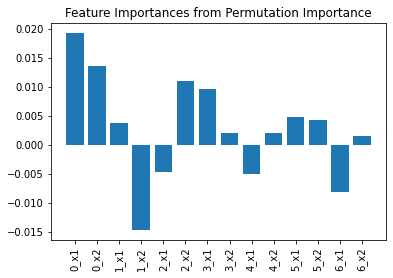

In [134]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# print feature importances
fig, ax = plt.subplots()
col = ['0_x1', '0_x2', '1_x1', '1_x2','2_x1', '2_x2','3_x1', '3_x2','4_x1', '4_x2','5_x1', '5_x2','6_x1', '6_x2',]
ax.bar(col, result.importances_mean)
ax.set_xticklabels(col, rotation=90)
ax.set_title('Feature Importances from Permutation Importance')
plt.show()


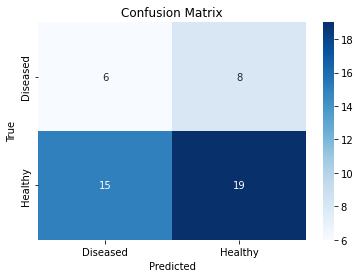

In [135]:
cm = confusion_matrix(rounded, y_test)
labels = ['Diseased', 'Healthy']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

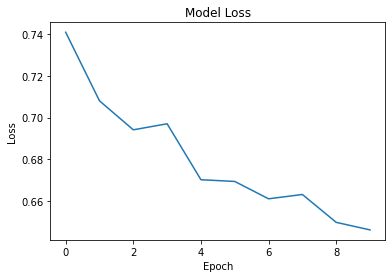

In [136]:
plt.plot(h.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Plot accuracy on same plt
#Downward trend for loss, and upward trend for the accuracy 

In [87]:
print(y_train.value_counts())
print(y_test.value_counts())

1    72
0    71
Name: labels, dtype: int64
1    18
0    18
Name: labels, dtype: int64
5 100 20
5 100 30
4 100 40
3 100 50
3 200 20
8 200 20
4 200 30
2 200 40
4 200 40
3 200 50
7 200 50
7 100 20
5 100 30
9 100 30
8 100 40
7 100 50
7 200 20
7 200 30
7 200 40
4 200 50
3 100 20
3 100 30
9 100 30
4 100 50
9 100 50
4 200 30
8 200 30
7 200 40
9 200 50
9 100 20
7 100 30
5 100 40
3 100 50
2 200 20
6 200 20
7 200 30
5 200 40
4 200 50
6 100 20
5 100 30
4 100 40
8 100 40
6 100 50
5 200 20
3 200 30
8 200 30
9 200 40
9 200 50
8 100 20
9 100 30
7 100 40
5 100 50
2 200 20
6 200 20
6 200 30
5 200 40
4 200 50
4 100 20
2 100 30
2 100 40
6 100 40
7 100 50
5 200 20
9 200 20
2 200 40
5 200 40
4 200 50
2 100 20
4 100 20
3 100 30
8 100 30
6 100 40
4 100 50
8 100 50
2 200 30
4 200 30
2 200 40
2 200 50
5 200 50
8 100 20
3 100 30
3 100 40
7 100 40
7 100 50
6 200 20
5 200 30
3 200 40
9 200 40
2 100 20
6 100 20
5 100 30
4 100 40
2 100 50
6 100 50
4 200 20
2 200 30
5 200 30
4 200 40
9 200 40
6 100 20
4 100 30
3 100

In [ ]:
#SMOTE

In [158]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy={1: 1000, 0: 1000})

# Fit SMOTE on X and y
smote.fit(X_train, y_train)

# Generate synthetic samples
n_synthetic_samples = 1000
X_synthetic, y_synthetic = smote.fit_resample(X_train, y_train)

# Concatenate original and synthetic data
X_new = np.concatenate((X_train, X_synthetic))
y_new = np.concatenate((y_train, y_synthetic))


/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 64)
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 64)
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 64)
  warnings.warn(
/home/sanmati/miniconda3/envs/sana-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 

(2128,)

## ONE FEATURE

In [ ]:
df2

In [75]:
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes-first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    return layers

FindLayerNodesLinear(4, 100, 50)

[100, 84, 67, 50]

In [77]:
def createmodel(n_layers, first_layer_nodes, activation_func, loss_func, last_layer_nodes):
    model = Sequential()
    print(n_layers, first_layer_nodes, last_layer_nodes)
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation_func))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation_func))
            
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss=loss_func, metrics = ["accuracy"]) 
    
    return model

model_x =  KerasClassifier(build_fn=createmodel, verbose = False)  


/tmp/ipykernel_448935/1189308091.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_x =  KerasClassifier(build_fn=createmodel, verbose = False)


In [78]:
activation_funcs = ['relu', 'tanh'] 
loss_funcs = ['binary_crossentropy']
param_grid = dict(n_layers=np.arange(2,5), first_layer_nodes = [100,125,150],activation_func = activation_funcs, loss_func = loss_funcs, last_layer_nodes= [40,50, 60], batch_size = [50], epochs = [25,50,75])
grid = GridSearchCV(estimator = model_x, param_grid = param_grid, n_jobs = -1)


In [79]:
grid.fit(X_train,y_train)

2023-03-13 23:35:44.936162: W tensorflow/core/data/root_dataset.cc:266] Optimization loop failed: CANCELLED: Operation was cancelled


4 100 50


GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2166709cc0>,
             n_jobs=-1,
             param_grid={'activation_func': ['relu', 'tanh'],
                         'batch_size': [50], 'epochs': [25, 50, 75],
                         'first_layer_nodes': [100, 125, 150],
                         'last_layer_nodes': [40, 50, 60],
                         'loss_func': ['binary_crossentropy'],
                         'n_layers': array([2, 3, 4])})

In [80]:
print(grid.best_score_)
print(grid.best_params_)

0.5709851503372192
{'activation_func': 'relu', 'batch_size': 50, 'epochs': 50, 'first_layer_nodes': 100, 'last_layer_nodes': 50, 'loss_func': 'binary_crossentropy', 'n_layers': 4}


In [91]:
optimizers = ['adam', 'sgd', 'rmsprop']
metrics = ['accuracy', Recall(), AUC()]
best_loss = float('inf')
best_optimizer = None
best_metric = None
# Compile the model with each optimizer and metric
for optimizer in optimizers:
    for metric in metrics:
        model_one_feature.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=metric)
        
        # Train and evaluate the model
        history = model_one_feature.fit(X_train, y_train, epochs=50, batch_size=50)
        val_loss, val_metric = model_one_feature.evaluate(X_test, y_test)
        
        # Print the validation loss and metric
#         print('Optimizer: {}, Metric: {}, Validation Loss: {:.4f}, Validation Metric: {:.4f}'.format(optimizer, metric, val_loss, val_metric))
        if val_loss < best_loss: 
            best_loss = val_loss
            best_optimizer = optimizer
            best_metric = metric
print(best_loss)
print(best_optimizer)
print(best_metric)
        







Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0612 - accuracy: 0.5183
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 0.9441 - accuracy: 0.4555
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.5340
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.5707
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.5497
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.5550
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6585 - accuracy: 0.5812
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.6806
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6299 - accuracy: 0.5969
Epoch 10/50
4/4 [==============================] - 0s 1ms/step - loss: 0.6081 - accuracy: 0.6492
Epoch 11/50
4/4 [======================

Epoch 21/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4735 - accuracy: 0.7225
Epoch 22/50
4/4 [==============================] - 0s 1ms/step - loss: 0.5640 - accuracy: 0.7277
Epoch 23/50
4/4 [==============================] - 0s 1ms/step - loss: 0.5004 - accuracy: 0.7277
Epoch 24/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7277
Epoch 25/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.7277
Epoch 26/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7225
Epoch 27/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.7487
Epoch 28/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7592
Epoch 29/50
4/4 [==============================] - 0s 1ms/step - loss: 0.5163 - accuracy: 0.6963
Epoch 30/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.7277
Epoch 31/50
4/4 [=============

2/2 [==============================] - 0s 2ms/step - loss: 0.9927 - recall: 0.2593
Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4156 - auc: 0.8265
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4201 - auc: 0.8821
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4374 - auc: 0.8638
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4384 - auc: 0.8643
Epoch 5/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4308 - auc: 0.8677
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4389 - auc: 0.8590
Epoch 7/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4509 - auc: 0.8579
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4216 - auc: 0.8800
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4541 - auc: 0.8480
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4269 - auc: 0.8673
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.3445 - auc: 0.9135
Epoch 14/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3384 - auc: 0.9211
Epoch 15/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3228 - auc: 0.9272
Epoch 16/50
4/4 [==============================] - 0s 1ms/step - loss: 0.2814 - auc: 0.9480
Epoch 17/50
4/4 [==============================] - 0s 1ms/step - loss: 0.4205 - auc: 0.8908
Epoch 18/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3428 - auc: 0.9185
Epoch 19/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3124 - auc: 0.9387
Epoch 20/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3426 - auc: 0.9219
Epoch 21/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3044 - auc: 0.9364
Epoch 22/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2940 - auc: 0.9449
Epoch 23/50
4/4 [==============================] - 0s 1ms/step - loss: 0.3144 - auc: 0.9360


In [175]:
# df1 = df1.sample(frac=1)
labels = df2.labels
df_one_feature = df2.drop(['labels'], axis =1 )
col = df_one_feature.columns
mm = MinMaxScaler()
df_one_feature = mm.fit_transform(df_one_feature)
df_one_feature = df_one_feature*100
X_train, X_test, y_train, y_test = train_test_split(df_one_feature, labels, test_size=0.2, random_state=84, stratify = labels)

print(y_train.value_counts())
print(y_test.value_counts())

# train = df_new[0:120]
# train_labels = np.array(labels[0:120])

# test = df_new[120:]
# test_labels = np.array(labels[120:])

#X_train, X_test, y_train, y_test = train_test_split(df_one_feature, labels, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


1    96
0    95
Name: labels, dtype: int64
0    24
1    24
Name: labels, dtype: int64


In [276]:

model_one_feature = Sequential()
model_one_feature.add(Dense(100, input_shape=(7,), activation='relu'))
# model_one_feature.add(Dropout(0.8))


model_one_feature.add(Dense(75, input_shape=(7,), activation='relu'))
#model_one_feature.add(Dense(60, input_shape=(7,), activation='relu'))
#
model_one_feature.add(Dense(50, input_shape=(7,), activation='relu'))
model_one_feature.add(Dropout(0.1))



# model_one_feature.add(Dense(65, input_shape=(7,), activation='relu'))
# model_one_feature.add(Dense(50, input_shape=(7,), activation='relu'))

model_one_feature.add(Dense(1, activation='sigmoid'))




In [277]:
model_one_feature.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')


In [281]:
X_train, X_test, y_train, y_test = train_test_split(df_one_feature, labels, test_size=0.2, random_state=84, stratify = labels)

h_new = model_one_feature.fit(
  X_train, # training data
  y_train, # training targets
  epochs=80,
  batch_size=50,
)


Epoch 1/80
4/4 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7539
Epoch 2/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4711 - accuracy: 0.7435
Epoch 3/80
4/4 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7592
Epoch 4/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7696
Epoch 5/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7853
Epoch 6/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.7173
Epoch 7/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.7487
Epoch 8/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4645 - accuracy: 0.7382
Epoch 9/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7696
Epoch 10/80
4/4 [==============================] - 0s 1ms/step - loss: 0.4644 - accuracy: 0.7592
Epoch 11/80
4/4 [======================

In [282]:
y_pred = model_one_feature.predict(X_train)
rounded = [int(round(x[0])) for x in y_pred]
from sklearn.metrics import accuracy_score
a = accuracy_score(rounded,y_train)
print('Accuracy is:', a*100)

6/6 [==============================] - 0s 585us/step
Accuracy is: 80.6282722513089


In [283]:
y_pred = model_one_feature.predict(X_test)

rounded = [int(round(x[0])) for x in y_pred]
from sklearn.metrics import accuracy_score
a = accuracy_score(rounded,y_test)
print('Accuracy is:', a*100)

2/2 [==============================] - 0s 1ms/step
Accuracy is: 56.25


2/2 [==============================] - 0s 1ms/step


/tmp/ipykernel_176931/2807221788.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col, rotation=90)


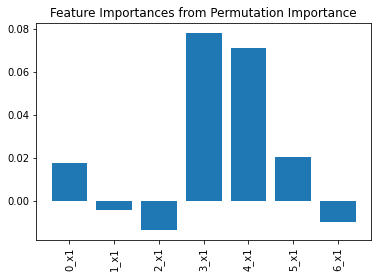

In [284]:
from sklearn.inspection import permutation_importance
result = permutation_importance(model_one_feature, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

# print feature importances
fig, ax = plt.subplots()
col = ['0_x1', '1_x1','2_x1','3_x1', '4_x1','5_x1','6_x1']
ax.bar(col, result.importances_mean)
ax.set_xticklabels(col, rotation=90)
ax.set_title('Feature Importances from Permutation Importance')
plt.show()


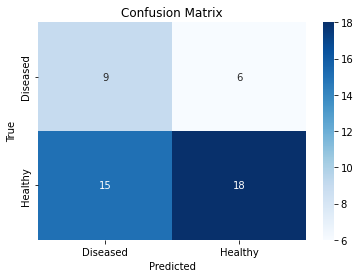

In [285]:
cm = confusion_matrix(rounded, y_test)
labels = ['Diseased', 'Healthy']

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()

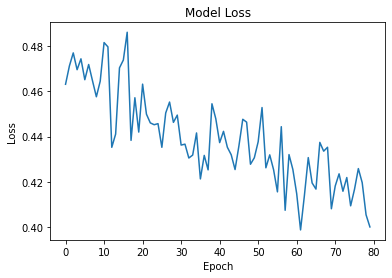

In [286]:
plt.plot(h_new.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Plot accuracy on same plt
#Downward trend for loss, and upward trend for the accuracy 